In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from networkx.algorithms import bipartite
from numpy import linalg as LA
from numpy.linalg import matrix_rank
import numpy as np
import json
import itertools

In [25]:
def divisor_graph(fact_type):
    divisors = generate_tuples(fact_type)
    g=nx.empty_graph(divisors)
    for i in divisors:
        for j in divisors:
            if comparison(i, j) or comparison(j,i):
                g.add_edge(i,j)
    return g 

def comparison(tuple_1, tuple_2):
    if len(tuple_1) != len(tuple_2) or (tuple_1 == tuple_2):
        return False 
    for i in range(len(tuple_1)):
        if tuple_1[i] > tuple_2[i]:
            return False 
    return True 
    
    
def generate_tuples(a):
    # Create a list of ranges for each element in the tuple
    ranges = [range(ai + 1) for ai in a]
    
    # Use itertools.product to generate the Cartesian product of these ranges
    result = list(itertools.product(*ranges))
    
    return result
def edge_count(g):
    d = {}
    for item in g.degree:
        d[item[1]] = d.get(item[1], 0) + 1
    return d


# Test the code for various factorization types

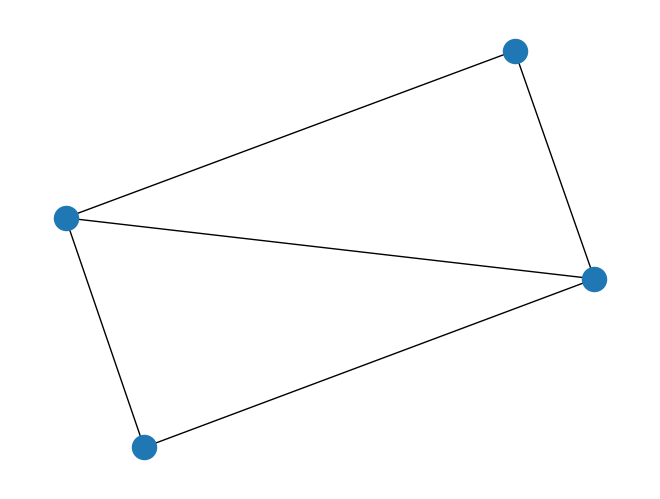

In [26]:
g = divisor_graph((1,1))
nx.draw(g)

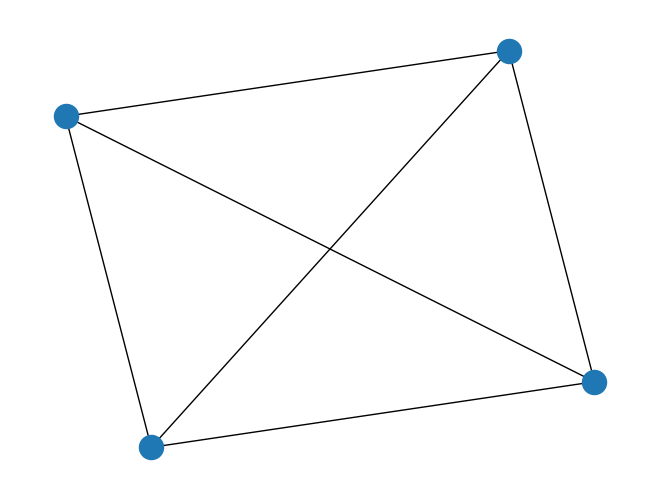

In [28]:
g = divisor_graph((3,))
nx.draw(g)

# Count the number of edges

In [37]:
d = {}
tuple_list = [(1,)*n for n in range(1, 6)]
for a in tuple_list:
    for e in range(1, 5):
        new_a= tuple([e*item for item in a]) 
        g = divisor_graph(new_a)
        if new_a not in d:
        #min_degree = sorted(g.degree(), key=lambda x: x[1])
            d[new_a] = edge_count(g)

In [36]:
d

{(1,): {1: 2},
 (2,): {2: 3},
 (1, 1): {3: 2, 2: 2},
 (2, 2): {8: 2, 6: 5, 4: 2},
 (1, 1, 1): {7: 2, 4: 6},
 (2, 2, 2): {26: 2, 18: 6, 10: 12, 14: 7}}

In [38]:
with open('degree_frequency_equal.txt', 'w') as f:
    for key, value in d.items():
         f.write(f'{key}: {value}\n')